In [1]:
from datasets import advice
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader
import json
import models
from sklearn.metrics import confusion_matrix
import tqdm

In [2]:
test_ds = advice.AdviceOneOptionDataset('data/advice_gen')

In [3]:
test_name = 'advice_one_resnet18_1'

In [4]:
with open(f'logs/{test_name}/config.json') as f:
    config = json.load(f)
model_name = config['model_name']
model_kwargs = config['model_kwargs']
model = getattr(models, model_name)(**model_kwargs).to('cuda')
model.load_state_dict(torch.load(f'logs/{test_name}/checkpoints/best_acc.pt'))
model = model.eval()

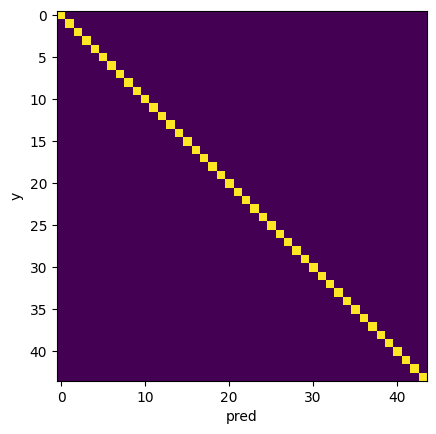

In [6]:
test_loader = DataLoader(test_ds, batch_size=64, shuffle=True, num_workers=16)
y_list= []
preds = []
with torch.no_grad():
    for x, y in tqdm.tqdm(test_loader, ncols=100, leave=False,):
        x = x.to('cuda')
        y = y.to('cuda')
        y_hat = model(x)
        y_hat = torch.argmax(y_hat, dim=1)
        y_list.append(y.cpu().numpy())
        preds.append(y_hat.cpu().numpy())
y_list = np.concatenate(y_list)
preds = np.concatenate(preds)
# confusion matrix of pred and y
cm = confusion_matrix(y_list, preds)
# plot confusion matrix
plt.imshow(cm)
# axis name
plt.xlabel('pred')
plt.ylabel('y')
plt.show()

In [7]:
for x, y in zip(np.nonzero(cm)[0], np.nonzero(cm)[1]):
    if x != y:
        print(x, y)

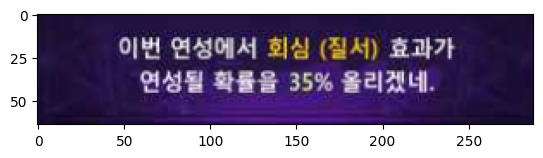

In [30]:
plt.imshow(test_ds[169][0].permute(1,2,0))
plt.show()

In [9]:
import pandas as pd
option_names = pd.read_csv('data/options.csv')['option_name'].values
print(option_names)

['힘' '지능' '민첩' '공격력' '무기 공격력' '탈출의 달인' '회피의 달인' '마나' '생명의 축복' '자원의 축복'
 '방랑자' '무력화' '물약 중독' '폭발물 달인' '행운 (질서)' '회심 (질서)' '달인 (질서)' '강맹 (질서)'
 '칼날 방패 (질서)' '선봉대 (질서)' '선각자 (질서)' '진군 (질서)' '신념 (질서)' '보스 피해' '각성기 피해'
 '보호막 강화' '회복 강화' '최대 생명력' '받는 피해 감소' '물리 방어력' '마법 방어력' '치명타 피해' '추가 피해'
 '아이덴티티 획득' '아군 강화' '행운 (혼돈)' '회심 (혼돈)' '달인 (혼돈)' '강맹 (혼돈)' '칼날 방패 (혼돈)'
 '선봉대 (혼돈)' '선각자 (혼돈)' '진군 (혼돈)' '신념 (혼돈)']


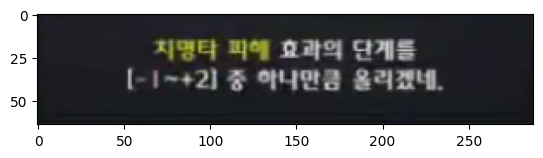

치명타 피해


In [33]:
from torchvision.io import read_image
from torchvision.transforms import Resize
indices = [193]
for idx in indices:
    test_img = read_image(f'data/advice_cut/{idx}.png').to(torch.float32)/255
    test_img = Resize((64,288))(test_img)
    plt.imshow(test_img.permute(1,2,0))
    plt.show()
    test_img_pred = model(test_img.unsqueeze(0).to('cuda'))
    print(option_names[torch.argmax(test_img_pred).item()])